## Part D:  Answering the research question

We wanted to know whether there is any relation between the COVID infection rate among the population of the NY state counties and their distance from the New York City. We collected the required data, transfered them to a database, made a new table with the required fields and imported back the table as a CSV.
Now we can do the 'analytic' operations to findout the answer.

### 1. Checking correlation by a scatterplot

#### 1a. Overviewing the csv imported from database

In [1]:
import csv
n=0
with open('Infection_Rate_Vs_Distance_2020_11_13.csv', 'r') as f:
    reader = csv.reader(f)
    
    for line in reader:
        print(line)
        if n>5:
            break
        n+=1

['county', 'Distance_From_Manhattan', 'Total_Case_On_Nov13_2020', 'population', 'Infection_Rate']
['Allegany', '233', '589', '46091', '1.2779']
['Cattaraugus', '264', '661', '76117', '0.8684']
['Cayuga', '204', '609', '76576', '0.7953']
['Chautauqua', '300', '1210', '126903', '0.9535']
['Chemung', '172', '2280', '83456', '2.7320']
['Clinton', '275', '356', '80485', '0.4423']


#### 1b. Making the plot

Text(0,0.5,'COVID Infection Percentage *10,000')

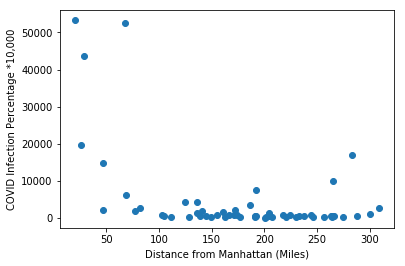

In [5]:
import matplotlib.pyplot as plt
import csv
distance_from_Manhattan, infection_rate  = [], []
n=0
with open('Infection_Rate_Vs_Distance_2020_11_13.csv') as csv_file:
    reader = csv.reader(csv_file)
    
    for column in reader:
        if n>0:
            distance_from_Manhattan.append(float(column[1]))
            infection_rate.append(float(column[2]))
        n+=1
plt.scatter(distance_from_Manhattan, infection_rate)

plt.xlabel("Distance from Manhattan (Miles)")
plt.ylabel("COVID Infection Percentage *10,000")

Just by observing the scatterplot, we can visually confirm that there is a strong negetive correlation between the Distance of a county from Manhattan and its COVID infection rate. So, in the next section, we'd go for checking its statistical significance.

### 2. Finding the Pearson's coefficient and testing its statistical significance at a 95% level

In [20]:
# The python package 'scipi' is used to find the Pearson correlation coefficient 
# We can test the significance with different confidence level, here a test with 95% confidence is done

test_level_percentage =95

alpha = 1-test_level_percentage/100
 
from scipy.stats import pearsonr
stat, p = pearsonr(distance_from_Manhattan, infection_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('No significant dependancy')
else:
    print('The coorelation is statistically significant at a '+ str(test_level_percentage)+'% '+'confidence level')

stat=-0.490, p=0.000
The coorelation is statistically significant at a 95% confidence level


# Conclusion

The answer of the researsch question is 'Yes', meaning that there is a statistically significant relation beteen the COVID infection rate among the population i NY state counties and their distances from New York City (Manhattan).

The less the the distance of a county from New York city, the more is the COVID infection rate among its population.